## LAB ACTIVITY 15
## NAME : SONALI R; REG NO : 22MID0061; COURSE CODE: CSI3007; LAB : L7+L8;
## DATE : 23/09/2025

## The Life Cycle of Matplotlib

In [91]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [92]:
# Loading the dataset using read_csv() from pandas library

data = pd.read_csv('Housing.csv')
print(data.head())  # displaying the first 5 rows

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [93]:
## Data preparation

In [94]:
# Aggregate data for plotting

avg_price_by_furnishing = data.groupby('furnishingstatus')['price'].mean()
furnishing_categories = avg_price_by_furnishing.index
average_prices = avg_price_by_furnishing.values

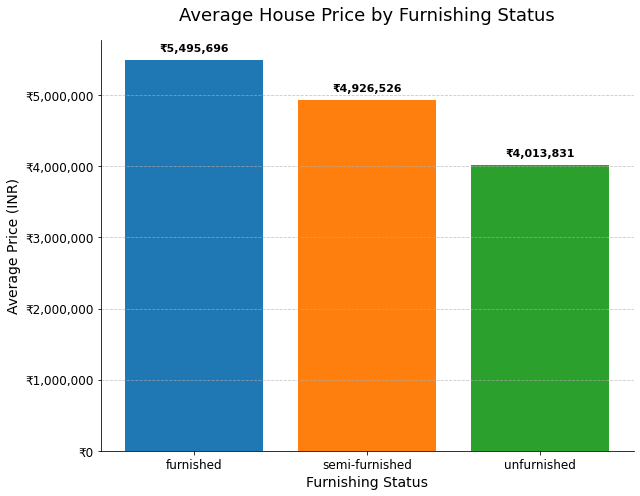

In [95]:
# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(9, 7))

# Plot the data on the Axes
ax.bar(furnishing_categories, average_prices, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Customize the title, labels, and tick marks
ax.set_title('Average House Price by Furnishing Status', fontsize=18, pad=20)
ax.set_xlabel('Furnishing Status', fontsize=14)
ax.set_ylabel('Average Price (INR)', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x:,.0f}'))

# Add data labels
for i, price in enumerate(average_prices):
    ax.text(i, price + 100000, f'₹{price:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# display the figure 
plt.tight_layout()
plt.show(block=True)

In [97]:
# save the figure to a file
fig.savefig('average_price_by_furnishing.png', dpi=300, bbox_inches='tight')

print("Image is saved Successfully!")

Image is saved Successfully!


## Loading the Image (Brightness, hue, saturation) and change the characterstics

In [98]:
from PIL import Image # Importing PIL to work on with image data

import matplotlib.pyplot as plt
import numpy as np

In [125]:
img = np.asarray(Image.open('stinkbug.png'))
print(repr(img)) # Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it's a black and white image, R, G, and B are all similar.

array([[111, 111, 111, ..., 106, 106, 106],
       [110, 110, 110, ..., 106, 106, 106],
       [108, 109, 109, ..., 105, 105, 105],
       ...,
       [103, 104, 105, ...,  99, 100, 100],
       [102, 102, 103, ..., 100, 101, 101],
       [102, 100, 100, ..., 101, 101, 102]], dtype=uint8)


In [126]:
# what does each function changes the pixel (weather addition or subtraction)

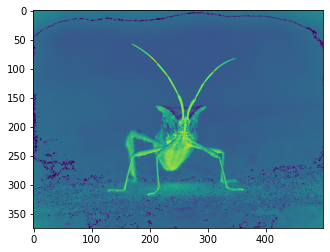

In [128]:
# Plotting numpy arrays as images
imgplot = plt.imshow(img)

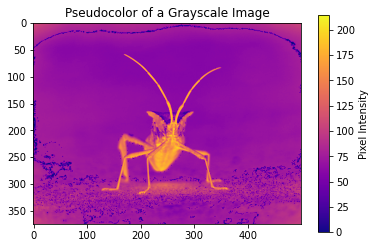

In [129]:
# To visualize it with pseudocolor, pass the 2D array directly to imshow()
plt.imshow(img, cmap='plasma') # Use a colormap like 'plasma', 'hot', or 'viridis'

# Add a colorbar to show the mapping of pixel intensity to color
plt.colorbar(label='Pixel Intensity')

# Add a title to your plot
plt.title('Pseudocolor of a Grayscale Image')

# Display the plot
plt.show()

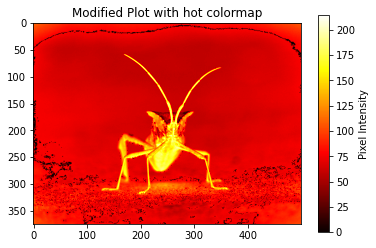

In [130]:
# To change the colormap, use the `set_cmap()` method on the `image_plot` object.
plt.figure() # Create a new figure for the modified plot
plt.title('Modified Plot with hot colormap')

# Re-display the same image data, but this time, get the plot object again
# This time, we don't need to specify the cmap in imshow
image_plot = plt.imshow(img)

# Now, apply the `set_cmap()` method to the existing image plot object.
image_plot.set_cmap('hot')

# Add a colorbar to the new plot
plt.colorbar(image_plot, label='Pixel Intensity')

plt.show()

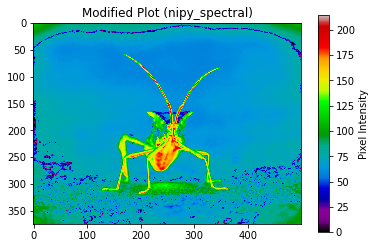

In [131]:
# Create a new figure to show the modified plot separately
plt.figure()

# The initial plot object (`imgplot`) won't be accessible after plt.show()
imgplot_modified = plt.imshow(img)

# Use set_cmap() on the new plot object to change the colormap
imgplot_modified.set_cmap('nipy_spectral')

# Add a colorbar and title for the modified plot
plt.colorbar(label='Pixel Intensity')
plt.title('Modified Plot (nipy_spectral)')

# Display the modified plot
plt.show()

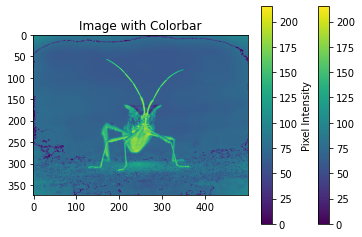

In [132]:
# plt.imshow() returns a mappable object, which we assign to `imgplot`.
# specify a colormap, such as 'viridis', to apply pseudocolor.
imgplot = plt.imshow(img, cmap='viridis')

# This ensures the colorbar is correctly linked to the data in the plot.
plt.colorbar(imgplot)

# To give the colorbar a label, you can use the `label` parameter.
plt.colorbar(imgplot, label='Pixel Intensity')

# Add a title to the plot for context.
plt.title('Image with Colorbar')

# Display the plot.
plt.show()

Original matrix shape: (375, 500)
Retrieved matrix shape: (375, 500)
Are the matrices identical? True


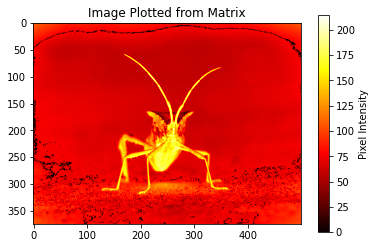

In [133]:
# Display the matrix as an image with a colorbar.
# plt.imshow() returns an `AxesImage` object, which is stored in `imgplot`.
imgplot = plt.imshow(img, cmap='hot')
plt.colorbar(imgplot, label='Pixel Intensity')
plt.title('Image Plotted from Matrix')

# Retrieve the matrix from the plot object.
# The `get_array()` method on the plot object retrieves the data used for plotting.
retrieved_matrix = imgplot.get_array()

# Verify that the retrieved matrix is identical to the original.
# You can check this by comparing the two arrays.
print("Original matrix shape:", img.shape)
print("Retrieved matrix shape:", retrieved_matrix.shape)
print("Are the matrices identical?", np.array_equal(img, retrieved_matrix))

# 5. Show the plot.
plt.show()

## Action on Pixel Data
 - Original  - It reads the numerical values but does not change them.
 - Retrieved - It reads the color mapping from plt.imshow() but does not affect the data.
 
## Action on Visualization
 - Maps the values to colors using a colormap and displays a 2D image.
 - Draws a visual legend (the colorbar) that explains the mapping of data values to colors.

(array([4.332e+03, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 7.000e+00,
        3.000e+00, 6.000e+00, 1.300e+01, 5.000e+00, 8.000e+00, 8.000e+00,
        1.000e+01, 1.200e+01, 8.000e+00, 1.300e+01, 2.100e+01, 5.000e+00,
        1.700e+01, 1.000e+01, 9.000e+00, 1.800e+01, 1.200e+01, 1.600e+01,
        2.200e+01, 1.900e+01, 2.800e+01, 2.300e+01, 4.200e+01, 4.300e+01,
        3.200e+01, 3.400e+01, 3.000e+01, 4.200e+01, 4.000e+01, 5.900e+01,
        5.600e+01, 6.700e+01, 6.200e+01, 8.200e+01, 7.600e+01, 9.500e+01,
        1.270e+02, 1.180e+02, 1.620e+02, 3.760e+02, 2.864e+03, 6.268e+03,
        6.472e+03, 5.291e+03, 6.328e+03, 6.074e+03, 6.747e+03, 8.563e+03,
        9.148e+03, 8.091e+03, 8.460e+03, 7.926e+03, 7.474e+03, 7.968e+03,
        8.196e+03, 7.181e+03, 6.404e+03, 6.422e+03, 6.197e+03, 5.584e+03,
        3.384e+03, 2.896e+03, 2.758e+0

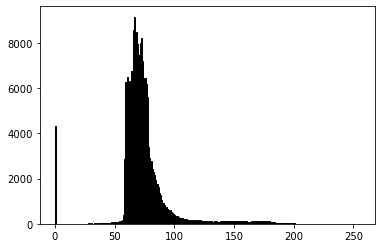

In [134]:
# Examining a specific data range

plt.hist(img.ravel(),
         # Set the bins from 0 to 255 (the full range of 8-bit pixel values).
         bins=range(256),
         # Set the face color (fc) of the histogram bars to black ('k').
         fc='k',
         # Set the edge color (ec) of the histogram bars to black ('k').
         ec='k')

- The x-axis represents the pixel intensity (or tonal) values. For an 8-bit grayscale image, these values typically range from 0 (pure black) to 255 (pure white).
- The y-axis represents the frequency (or count) of pixels that have a particular intensity value. The height of each bar corresponds to the number of pixels at that specific brightness level. 

In [3]:
## Finding the inverse of image (Matrix of pixel values) and finding the negative image (inverted image)

In [ ]:
## Plotting numerical data, categorical data, text data (Word cloud), ordinal data, audio data and image data